In [1]:
import math
from sortedcontainers import SortedDict
import random
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import truncnorm
from scipy.stats import norm
from heapq import nsmallest


In [5]:
def generate_positions(males, x_dim, y_dim):
    Xs = numpy.random.rand(males) * x_dim
    Ys = numpy.random.rand(males) * y_dim
    return [Xs,Ys]
def compute_distances_travel_times(males, positions, bird_speed):
    male_dist = numpy.zeros((males, males))
    travel_times = numpy.zeros((males, males))
    for i in range(males):
        for j in range(i + 1, males):
            dist = math.sqrt((positions[0][j] - positions[0][i]) ** 2 + (positions[1][j] - positions[1][i]) ** 2)
            travel = dist / bird_speed
            male_dist[j][i] = dist
            male_dist[i][j] = dist
            travel_times[j][i] = travel
            travel_times[i][j] = travel
    return (male_dist, travel_times)

males=100
bird_speed=12
dim_vec=[450, 900, 2250, 4500, 9000]
numsims=1000
numneigh=99
av=numpy.zeros((numneigh, numsims))
simav=numpy.zeros((numneigh, len(dim_vec)))
for j in range(len(dim_vec)):
    x_dim=dim_vec[j]
    y_dim=dim_vec[j]
    for i in range(numsims):
        positions = generate_positions(males, x_dim, y_dim)
        distances, travel_times = compute_distances_travel_times(males, positions, bird_speed)
        nndist=[]
        for z in range(males):
            dists=distances[z,:]
            nndist.append(nsmallest(numneigh, dists[numpy.nonzero(dists)]))
        #print(nndist)
        av[:,i]=numpy.mean(nndist, axis=0)
    #print(av)
    simav[:,j]=numpy.mean(av, axis=1)
print(simav) #simav is going across a row is increasing dim and going down a col is increasing nth nearest neighbor


[[  23.54644407   46.93957688  117.2913514   234.06361069  468.73044675]
 [  35.82178947   71.5142695   178.35225354  356.9063982   714.14813315]
 [  45.26882057   90.57584234  225.73673517  451.03366041  904.94298518]
 [  53.33046925  106.70273331  266.2515908   531.54004865 1066.36965535]
 [  60.52284837  121.02105579  302.10949834  603.20810943 1211.13961868]
 [  67.12933355  134.20409375  334.96468289  669.31593191 1342.37966895]
 [  73.26704291  146.53204135  365.73939796  730.63156314 1466.19996759]
 [  79.01160811  158.10073598  394.73474647  788.36114176 1581.71497813]
 [  84.55031644  169.20861607  422.30603861  843.32642944 1692.14273383]
 [  89.83251085  179.67582193  448.81140209  895.91241001 1797.50753137]
 [  94.88094797  189.80810137  474.05846566  946.71991193 1898.26663872]
 [  99.76919144  199.65942857  498.41133369  995.45207922 1996.7271196 ]
 [ 104.51074485  209.16387509  522.30428728 1043.16784365 2091.65633721]
 [ 109.11152337  218.3753106   545.45419344 1089.23

In [3]:
numpy.mean(simav, axis=0) #average distance between birds (NOT nearest neighbors) for the different dims

array([ 233.13591981,  473.7894059 , 1192.00501678, 2313.44752381,
       4664.34276485])

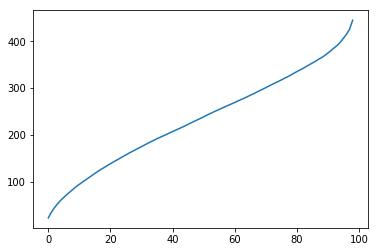

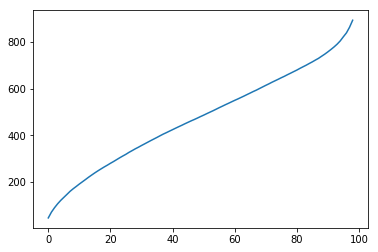

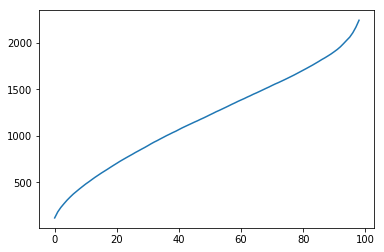

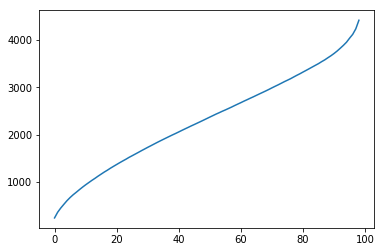

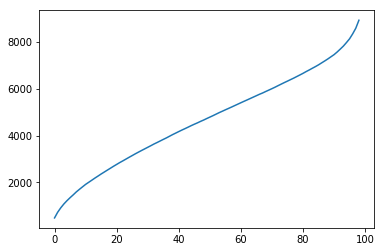

In [4]:
# a lot of birds near the average distance between birds -- fewer at the extremes (close and far)
#note: this could also be represented with a bell curve
plt.figure()
plt.plot(range(99), simav[:,0])
plt.figure()
plt.plot(range(99), simav[:,1]) 
plt.figure()
plt.plot(range(99), simav[:,2])
plt.figure()
plt.plot(range(99), simav[:,3])
plt.figure()
plt.plot(range(99), simav[:,4])